https://www.kaggle.com/anokas/kuzushiji

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [3]:
img_train = np.load("kmnist-train-imgs.npz")['arr_0']

In [6]:
img_test = np.load("kmnist-test-imgs.npz")['arr_0']
label_train = np.load("kmnist-train-labels.npz")['arr_0']
label_test = np.load("kmnist-test-labels.npz")['arr_0']

In [7]:
np.unique(label_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
from PIL import Image

In [9]:
Image.fromarray(img_train[0]).resize((20,20))

In [10]:
small_imgs_train=[]
small_imgs_test=[]
for i in range(img_train.shape[0]):
    small_imgs_train.append(np.array(Image.fromarray(img_train[i]).resize((20,20))))
    
small_imgs_train=np.array(small_imgs_train)
for i in range(img_test.shape[0]):
    small_imgs_test.append(np.array(Image.fromarray(img_test[i]).resize((20,20))))
    
small_imgs_test=np.array(small_imgs_test)

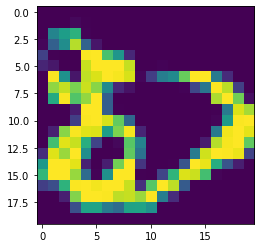

In [11]:
X_train, X_test = small_imgs_train, small_imgs_test
import matplotlib.pyplot as plt

plt.imshow(X_train[2])
plt.show()
X_train=X_train.reshape(X_train.shape[0],-1)
X_test=X_test.reshape(X_test.shape[0],-1)

y_train, y_test = label_train, label_test
y_train=y_train.reshape(y_train.shape[0],-1)
y_test=y_test.reshape(y_test.shape[0],-1)

In [12]:
X_train.shape

(60000, 400)

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(25,10,10), max_iter=100, #alpha=1e-4,
                    solver='adam', verbose=10, random_state=1,
                    learning_rate_init=.0002)

In [14]:

mlp.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(25, 10, 10), learning_rate_init=0.0002,
              max_iter=100, random_state=1, verbose=10)

In [20]:

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.640183
Test set score: 0.490300


In [23]:
mlp.coefs_[0].shape

(400, 25)

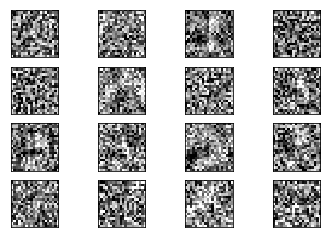

In [25]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(20, 20), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

TODO:

resize imgs using PIL
try to improve accuracy

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

TODO:
mlp classifier on MNIST dataset
Coefficients of mnist plotted in an image for the first layer (0) index